In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

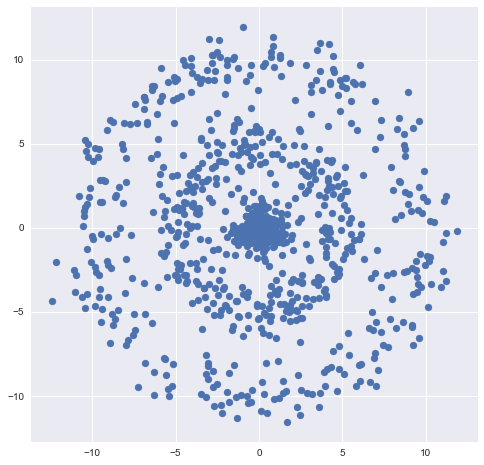

In [3]:
np.random.seed(0)
N = 1000
c= np.random.randint(0,3,N)
r  = np.random.randn(N) + 5.0 *c

theta = np.random.uniform(0,2*np.pi,N)
x = r*np.cos(theta)
y = r*np.sin(theta)
Y = np.vstack([x,y]).T

plt.figure(figsize=(8,8))
plt.scatter(x,y)

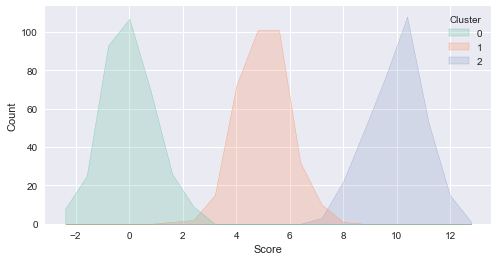

In [4]:
plt.figure(figsize = (8,4))
df = pd.DataFrame({"Score":r, "Cluster":c})
sns.histplot(df,x = "Score",bins = 20,hue = "Cluster", element = 'poly',palette = "Set2")
plt.show()

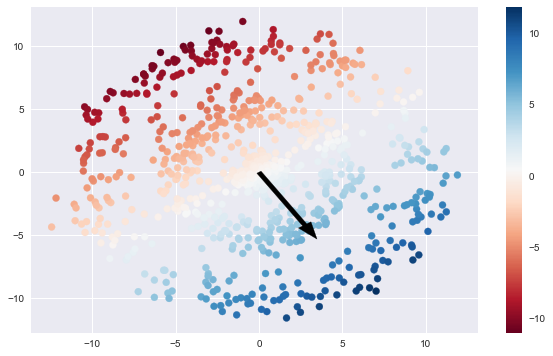

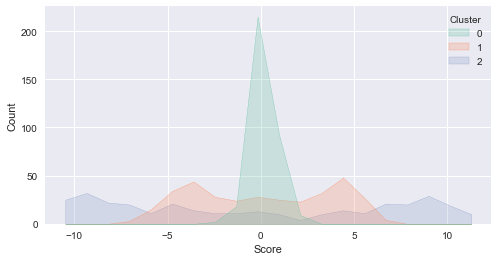

In [6]:
from sklearn.decomposition import PCA, KernelPCA
pca = PCA(1).fit(Y)
scores = pca.transform(Y)
loadings = pca.components_

plt.figure(figsize = (10,6))
plt.scatter(x,y,c = scores[:,0], cmap = 'RdBu')
plt.colorbar()
plt.arrow(0.,0., loadings[0,0]*5, loadings[0,1]*5. , width = 0.3, color = 'black')

plt.figure(figsize = (8,4))
df = pd.DataFrame({'Score': scores.flatten(),"Cluster":c})
sns.histplot(df, x="Score", bins=20, hue="Cluster", element="poly", palette="Set2")
plt.show()

In [9]:
scores.shape

(1000, 1)

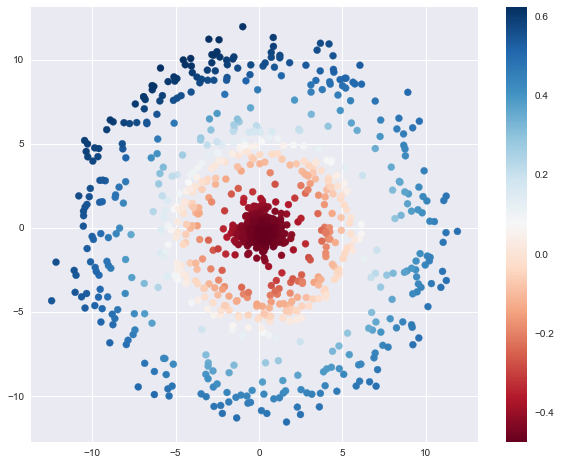

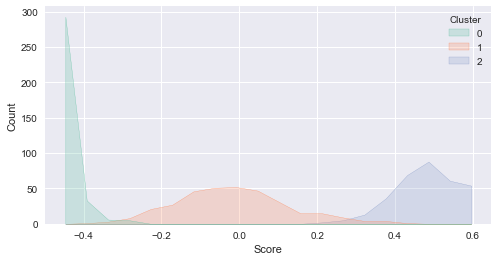

In [10]:
# kernel
pca = KernelPCA(1,kernel = "rbf", gamma = 0.02).fit(Y)
scores = pca.transform(Y)
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c=scores[:, 0], cmap="RdBu")
plt.colorbar() 
plt.figure(figsize=(8, 4))
df = pd.DataFrame({"Score": scores.flatten(), "Cluster": c})
sns.histplot(df, x="Score", bins=20, hue="Cluster", element="poly", palette="Set2")
plt.show()

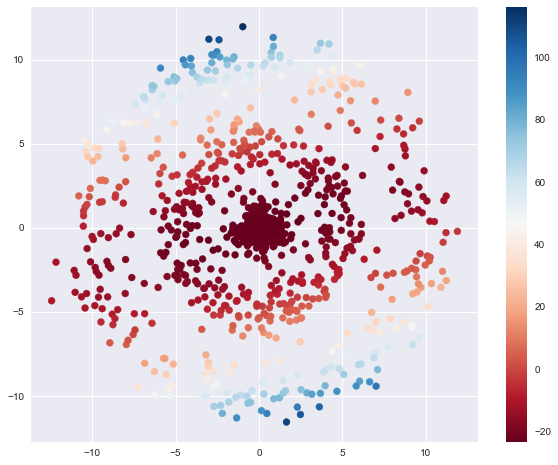

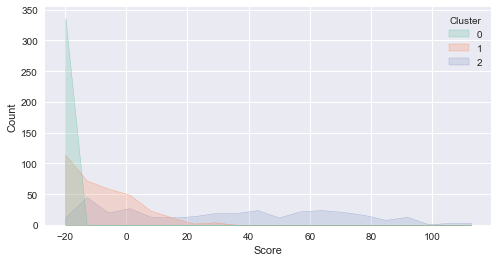

In [11]:
# Polynomial kernel
pca = KernelPCA(1, kernel="poly", degree=2, gamma=1.).fit(Y)
scores = pca.transform(Y)
# plot data with scores as color
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c=scores[:, 0], cmap="RdBu")
plt.colorbar()
# histogram of scores
plt.figure(figsize=(8, 4))
df = pd.DataFrame({"Score": scores[:, 0], "Cluster": c})
sns.histplot(df, x="Score", bins=20, hue="Cluster", element="poly", palette="Set2")
plt.show()

In [12]:
?KernelPCA

Init signature:
KernelPCA(
    n_components=None,
    *,
    kernel='linear',
    gamma=None,
    degree=3,
    coef0=1,
    kernel_params=None,
    alpha=1.0,
    fit_inverse_transform=False,
    eigen_solver='auto',
    tol=0,
    max_iter=None,
    remove_zero_eig=False,
    random_state=None,
    copy_X=True,
    n_jobs=None,
)
Docstring:     
Kernel Principal component analysis (KPCA).

Non-linear dimensionality reduction through the use of kernels (see
:ref:`metrics`).

Read more in the :ref:`User Guide <kernel_PCA>`.

Parameters
----------
n_components : int, default=None
    Number of components. If None, all non-zero components are kept.

kernel : {'linear', 'poly',             'rbf', 'sigmoid', 'cosine', 'precomputed'}, default='linear'
    Kernel used for PCA.

gamma : float, default=None
    Kernel coefficient for rbf, poly and sigmoid kernels. Ignored by other
    kernels. If ``gamma`` is ``None``, then it is set to ``1/n_features``.

degree : int, default=3
    Degree for

In [2]:
import numpy as np
data = np.random.normal(size = (100,1000))
S = ((data - data.mean(0))).T @ (data - data.mean(0)) /100
evals, evecs = np.linalg.eigh(S)
S.shape

(1000, 1000)

In [3]:
Gram = ((data - data.mean(0))) @ (data - data.mean(0)).T /100
ev,evec = np.linalg.eig(Gram)


In [4]:
import time
dims = [100, 1000, 10000]

for dim in dims:
    print('Dim is {}'.format(dim))
    data = np.random.normal(size=(100,dim))

    # Perform the naive approach
    S = ((data-data.mean(0)).T @ (data-data.mean(0)))*(1/100)
    start = time.time()
    evals, evecs = np.linalg.eigh(S)
    print("Naive way took {}".format(time.time()-start))

    # Perform the HDPCA procedure above.
    Gram = ((data-data.mean(0)) @ (data-data.mean(0)).T)*(1/100)
    start = time.time()
    ev, evec = np.linalg.eig(Gram)
    print("High dim PCA took {}".format(time.time()-start))
    print('\n')

Dim is 100
Naive way took 0.0029900074005126953
High dim PCA took 0.004988193511962891


Dim is 1000
Naive way took 0.0797584056854248
High dim PCA took 0.0029952526092529297


Dim is 10000
Naive way took 73.23096895217896
High dim PCA took 0.004987001419067383




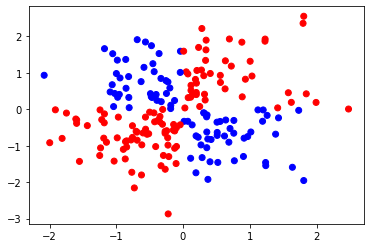

In [7]:
N = 200
data = np.random.normal(size = (N,2))
colors = np.where(np.prod(data, axis = 1)> 0, "r",'b')
import matplotlib.pyplot as plt
_ = plt.scatter(data[:,0],data[:,1], c= colors)

In [8]:
def kern(v1,v2):
    return np.inner(v1,v2) + 100*v1[0]*v1[1]*v2[0]*v2[1]

kernel_gram = np.empty((N,N))
for i in np.arange(N):
    for j in np.arange(N):
        kernel_gram[i,j] = kern(data[i],data[j])

In [9]:
_1 = np.ones(N).reshape((-1,1))
scaler = np.eye(N) - _1@_1.T/N
K = scaler @kernel_gram@scaler

In [11]:
ev,evec = np.linalg.eig(K)
p = 2
lambdas = ev.astype(np.float64)[:p]
us = evec[:,:p]

C:\Users\HanZhang\AppData\Local\Temp/ipykernel_46112/2384358293.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  lambdas = ev.astype(np.float64)[:p]


In [12]:
scores = K @ us/np.sqrt(N*lambdas)

D:\conda\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


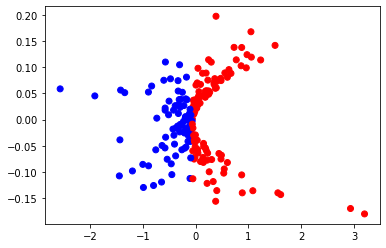

In [14]:
_ = plt.scatter(scores[:,0],scores[:,1], c = colors)

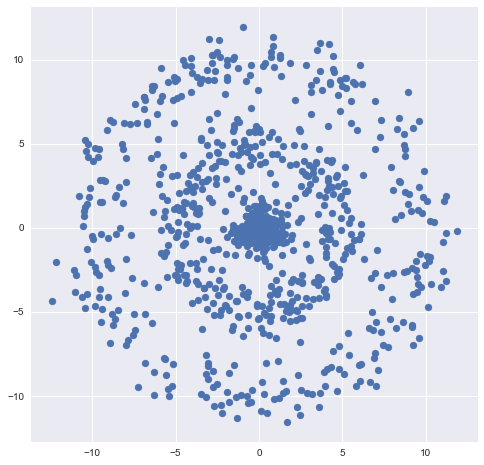

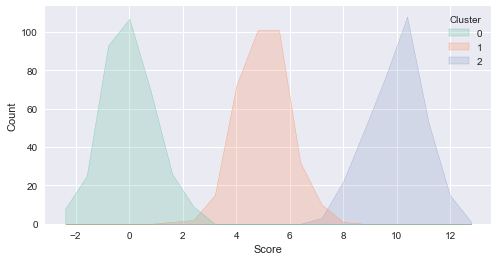

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

# generate data
np.random.seed(0)
N = 1000
c = np.random.randint(0, 3, N)
r = 5.0*c + np.random.randn(N)
theta = np.random.uniform(0, 2*np.pi, N)
x = r * np.cos(theta); y = r * np.sin(theta)
Y = np.vstack([x, y]).T

# plot data
plt.figure(figsize=(8, 8))
plt.scatter(x, y)

# histogram of radius reveals clear (linear) clustering
plt.figure(figsize=(8, 4))
df = pd.DataFrame({"Score": r, "Cluster": c})
sns.histplot(df, x="Score", bins=20, hue="Cluster", element="poly", palette="Set2")
plt.show()

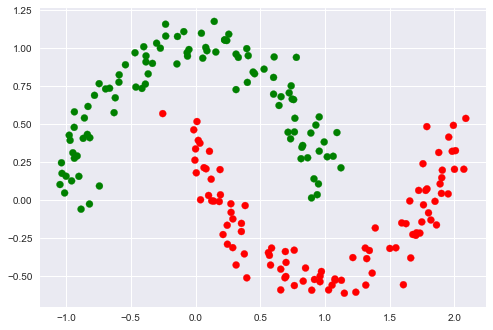

In [17]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
N = 200
data, colors = make_moons(N, noise=.1)
colors = np.where(colors > .5, 'r', 'g')
_ = plt.scatter(data[:,0], data[:,1], c=colors)
plt.show()

In [32]:
import pyreadr
df = pyreadr.read_r('nytimes.RData')
nyt = df['nyt.frame']
labels = nyt['class.labels']
X = nyt.drop(columns = 'class.labels').values

In [25]:
labels

0        art
1        art
2        art
3        art
4        art
       ...  
97     music
98     music
99     music
100    music
101    music
Name: class.labels, Length: 102, dtype: category
Categories (2, object): ['art', 'music']

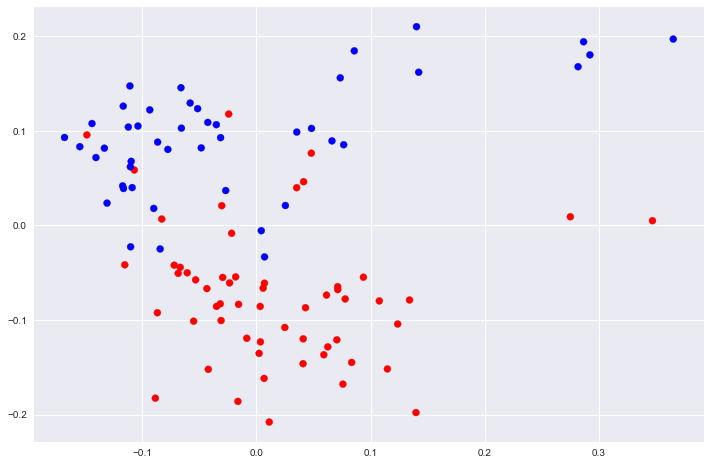

In [31]:
from sklearn.decomposition import KernelPCA

num_pc = [1,2,3]
kernel_func = ['rbf', 'poly']
fig,axs = plt.subplots(figsize = (12,8))
colors = np.where(labels =='art', 'r','b')
pca = KernelPCA(2,kernel = 'rbf', gamma =1).fit(X.values)
scores = pca.transform(X.values)
axs.scatter(scores[:,0],scores[:,1],c =colors)


In [33]:
# kernel 
kpca_rbf  = {
    gamma: KernelPCA(3,kernel = 'rbf', gamma = gamma).fit_transform(X) for gamma in [0.1,0.5,1.,2.,5.,10.]
}
kpca_poly = {
    coef0: KernelPCA(3, kernel = 'poly', gamma = 1.,degree = 3, coef0 = coef0). fit_transform(X)
    for coef0 in [0.1,0.5,1.,2.,5.,10.]
}


Text(0.5, 0.98, 'Polynomial Kernel PCA')

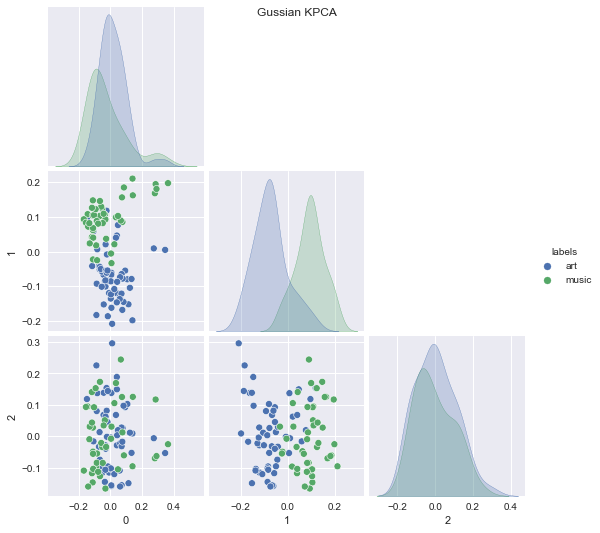

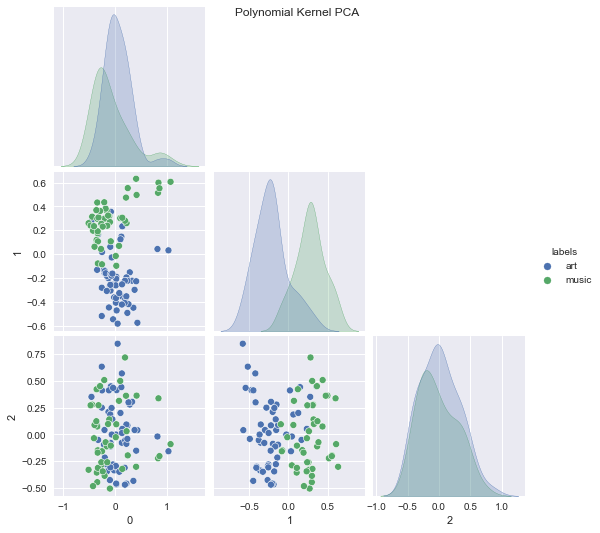

In [35]:
scores = pd.DataFrame(kpca_rbf[1.])
scores['labels'] = labels
sns.pairplot(scores,hue = 'labels',corner = True)
plt.suptitle('Gussian KPCA')
scores = pd.DataFrame(kpca_poly[1.])
scores["labels"] = labels
sns.pairplot(scores, hue="labels", corner=True)
plt.suptitle("Polynomial Kernel PCA")